nba game 

http://api.suredbits.com/nba/v0/games

http://api.suredbits.com/nfl/v0/players/brady/tom

https://erikberg.com/nba/teams.json

make request for yesterdays games

In [631]:
import requests
import arrow
import datetime
import nltk
import getpass
import json

import PIL
from PIL import ImageDraw, ImageFont

In [632]:
myusr = getpass.getuser()

In [633]:
myusr

'pi'

In [634]:
#nbagame = requests.get('http://api.suredbits.com/nba/v0/games')

In [635]:
arrow.now()

<Arrow [2018-04-17T01:20:13.111655+12:00]>

In [636]:
previouday = arrow.utcnow().replace(days=-1)

In [637]:
pred = previouday.date()

In [638]:
print(pred.day)

15


In [639]:
print(pred.month)

4


In [640]:
print(pred.year)

2018


In [641]:
nbagame = requests.get('http://api.suredbits.com/nba/v0/games/{}/{}/{}'.format(pred.year, pred.month, pred.day))

In [642]:
import json

In [643]:
reqteams = requests.get('https://erikberg.com/nba/teams.json')

In [644]:
tjdump = reqteams.json()

In [645]:
tjdump

{'error': {'code': '403',
  'description': 'Invalid user agent: python-requests/2.18.4. Please refer to the user agent guidelines specified at https://erikberg.com/api#ua.'}}

In [646]:
with open('/home/pi/dell-wcm/posts/teams.json', 'r') as teamjs:
    tjdump = json.loads(teamjs.read())

In [647]:
abrev = 'BKN'

In [648]:
for tjd in tjdump:
    #print(tjd)
    if tjd['abbreviation'] == abrev:
        print(tjd)
        print(tjd['teamName'])

{'location': 'Brooklyn', 'teamName': 'Brooklyn Nets', 'abbreviation': 'BKN', 'simpleName': 'Nets', 'teamId': 1610612751}
Brooklyn Nets


In [649]:
nbgj =  nbagame.json()

In [650]:
totgame = len(nbgj)

In [651]:
#arrow.get('20170331')

In [652]:
#datim = datetime.datetime('20170331T213000.000Z')

In [653]:
#arrow.get('2017')

In [654]:
timnow = arrow.now()

In [655]:
timnow

<Arrow [2018-04-17T01:20:19.657238+12:00]>

In [656]:
nbgj

[]

In [657]:
import glob
import os
filelist=glob.glob("/home/pi/was/static/*.png")
for file in filelist:
    os.remove(file)

In [658]:
homewine = 0
homelise = 0

awaywine = 0
awaylise = 0

In [659]:
homewine

0

In [660]:
homelise

0

In [661]:
awaywine

0

In [662]:
awaylise

0

In [663]:
for nbg in nbgj:
    print(nbg)
    #print(nbg['startTime'])
    print(nbg['homeTeam']['teamID'])
    print(nbg['homeTeam']['finalScore'])
    
    for tjd in tjdump:
    #print(tjd)
        if tjd['abbreviation'] == nbg['homeTeam']['teamID']:
            print(tjd)
            homename = (tjd['teamName'])
        
        elif tjd['abbreviation'] == nbg['awayTeam']['teamID']:
            print(tjd)
            awayname = (tjd['teamName'])
    
    if nbg['homeTeam']['finalScore'] > nbg['awayTeam']['finalScore']:
        homeverdic = 'winner'
        homewine = homewine + 1
        awayverdic = 'loser'
        awaylise = awaylise +1 
        
        
    elif nbg['homeTeam']['finalScore'] < nbg['awayTeam']['finalScore']:
            homeverdic = 'loser'
            homelise = homelise + 1
            awayverdic = 'winner'
            awaywine = awaywine +1
        #memename = request.json.get('memename')

    toptext = homename + ' ' + str(nbg['homeTeam']['finalScore']) + ' ' + homeverdic

    bottomtext = awayname + ' ' + str(nbg['awayTeam']['finalScore']) + ' ' + awayverdic

    #user= request.json.get('user')
    
    

    timnow = arrow.now()
    timstr = timnow.timestamp

    galdirdir = '/home/{}/was/static'.format(myusr)



        #with open('/home/{}/rbnz-tech-backup/artctrl/meme/galleries/default')

    #img = Image.open('/home/{}/artctrl/meme/galleries/default/{}.jpg'.format(myusr, memename))
    img = PIL.Image.new("RGBA", (800, 100), (255,255,255))
    imageSize = img.size

        # find biggest font size th90t works
    fontSize = int(imageSize[1]/5)
    font = ImageFont.truetype("/home/{}/Downloads/impact.ttf".format(myusr), fontSize)
    topTextSize = font.getsize(toptext)
    bottomTextSize = font.getsize(bottomtext)

    while topTextSize[0] > imageSize[0]-20 or bottomTextSize[0] > imageSize[0]-20:
        fontSize = fontSize - 1
        font = ImageFont.truetype("/home/{}/Downloads/impact.ttf".format(myusr), fontSize)
        topTextSize = font.getsize(toptext)
        bottomTextSize = font.getsize(bottomtext)

        # find top centered position for top text
    topTextPositionX = (imageSize[0]/2) - (topTextSize[0]/2)
    topTextPositionY = 0
    topTextPosition = (topTextPositionX, topTextPositionY)

        # find bottom centered position for bottom text
    bottomTextPositionX = (imageSize[0]/2) - (bottomTextSize[0]/2)
    bottomTextPositionY = imageSize[1] - bottomTextSize[1] -10
    bottomTextPosition = (bottomTextPositionX, bottomTextPositionY)

    draw = ImageDraw.Draw(img)

    outlineRange = int(fontSize/15)
    for x in range(-outlineRange, outlineRange+1):
        for y in range(-outlineRange, outlineRange+1):
                draw.text((topTextPosition[0]+x, topTextPosition[1]+y), toptext, (0,0,0), font=font)
                draw.text((bottomTextPosition[0]+x, bottomTextPosition[1]+y), bottomtext, (0,0,0), font=font)

    draw.text(topTextPosition, toptext, (255,255,255), font=font)
    draw.text(bottomTextPosition, bottomtext, (255,255,255), font=font)
    img.save('/home/{}/was/static/{}{}.png'.format(myusr, nbg['homeTeam']['teamID'], nbg['awayTeam']['teamID']))

            #img.save("/home/{}/memetest/galleries/{}/{}.jpg".format(myusr, usrfolz, gtm['id']))
    


    #memedict = dict({'nba' : memename, 'toptext' : toptext.upper(), 'bottomtext' : bottomtext.upper(), 'imagepath' : '/home/{}/rbnz-tech-backup/artctrl/meme/galleries/{}/{}-{}.jpg'.format(myusr, user, memename, timstr)})
    #return(jsonify(memedict))

    print(nbg['awayTeam']['teamID'])
    print(nbg['awayTeam']['finalScore'])

In [664]:
awa

NameError: name 'awa' is not defined

In [665]:
#memename = request.json.get('memename')

toptext = 'Milwaukee Bucks' + ' ' + str(69) + ' ' + 'Loser'

bottomtext = 'Washington Wizards' + ' ' + str(99) + ' ' + 'Winner'
#toptext = 'MEM'

#bottomtext = request.json.get('bottomtext')
#bottomtext = 'DET'
#user= request.json.get('user')

timnow = arrow.now()
timstr = timnow.timestamp

galdirdir = '/home/{}/was/static/'.format(myusr)



    #with open('/home/{}/rbnz-tech-backup/artctrl/meme/galleries/default')

#img = Image.open('/home/{}/artctrl/meme/galleries/default/{}.jpg'.format(myusr, memename))
img = PIL.Image.new("RGBA", (800, 200), (255,255,255))
imageSize = img.size

    # find biggest font size th90t works
fontSize = int(imageSize[1]/5)
font = ImageFont.truetype("/home/{}/Downloads/impact.ttf".format(myusr), fontSize)
topTextSize = font.getsize(toptext)
bottomTextSize = font.getsize(bottomtext)

while topTextSize[0] > imageSize[0]-20 or bottomTextSize[0] > imageSize[0]-20:
    fontSize = fontSize - 1
    font = ImageFont.truetype("/home/{}/Downloads/impact.ttf".format(myusr), fontSize)
    topTextSize = font.getsize(toptext)
    bottomTextSize = font.getsize(bottomtext)

    # find top centered position for top text
topTextPositionX = (imageSize[0]/2) - (topTextSize[0]/2)
topTextPositionY = 0
topTextPosition = (topTextPositionX, topTextPositionY)

    # find bottom centered position for bottom text
bottomTextPositionX = (imageSize[0]/2) - (bottomTextSize[0]/2)
bottomTextPositionY = imageSize[1] - bottomTextSize[1] -10
bottomTextPosition = (bottomTextPositionX, bottomTextPositionY)

draw = ImageDraw.Draw(img)

outlineRange = int(fontSize/15)
for x in range(-outlineRange, outlineRange+1):
    for y in range(-outlineRange, outlineRange+1):
            draw.text((topTextPosition[0]+x, topTextPosition[1]+y), toptext, (0,0,0), font=font)
            draw.text((bottomTextPosition[0]+x, bottomTextPosition[1]+y), bottomtext, (0,0,0), font=font)

draw.text(topTextPosition, toptext, (255,255,255), font=font)
draw.text(bottomTextPosition, bottomtext, (255,255,255), font=font)
img.save('/home/{}/was/static/WASBUK.png'.format(myusr))

        #img.save("/home/{}/memetest/galleries/{}/{}.jpg".format(myusr, usrfolz, gtm['id']))


#memedict = dict({'nba' : memename, 'toptext' : toptext.upper(), 'bottomtext' : bottomtext.upper(), 'imagepath' : '/home/{}/rbnz-tech-backup/artctrl/meme/galleries/{}/{}-{}.jpg'.format(myusr, user, memename, timstr)})
#return(jsonify(memedict))


In [666]:
import os

In [667]:
os.listdir('/home/pi/was/static')

['WAS-14.jpg',
 'WAS-3.jpg',
 'WAS-19.jpg',
 'WAS-5.jpg',
 'WAS-12.jpg',
 'WAS-22.jpg',
 'WAS-6.jpg',
 'WAS-13.jpg',
 'WAS-9.jpg',
 'WAS-7.jpg',
 'WAS-18.jpg',
 'WAS-24.jpg',
 'WAS-23.jpg',
 'WAS-20.jpg',
 'WASBUK.png',
 'WAS-11.jpg',
 'WAS-16.jpg',
 'WAS-17.jpg',
 'WAS-1.jpg',
 'WAS-0.jpg',
 'WAS-2.jpg',
 'WAS-8.jpg',
 'WAS-21.jpg',
 'WAS-4.jpg',
 'WAS-10.jpg',
 'WAS-15.jpg']

In [668]:
gifcity = 'http://api.giphy.com/v1/gifs/search?q=Washington Wizards&api_key=dc6zaTOxFJmzC'

In [669]:
reqcit = requests.get(gifcity)

In [670]:
nbajs = (reqcit.json())

In [671]:
lendat = len(nbajs['data'])

In [672]:
print(lendat)

25


In [673]:
import shutil

In [674]:
thlis= list()

In [675]:
thenumber = 0

In [676]:
somelis = list()

In [677]:
for lend in range(0, 25):
    #print(nbajs['data'][lend]['images']['480w_still']['url'])
    response = requests.get(nbajs['data'][lend]['images']['480w_still']['url'], stream=True)
    with open('/home/pi/was/static/WAS-{}.jpg'.format(lend), 'wb') as out_file:
        shutil.copyfileobj(response.raw, out_file)
        del response

    imgp = PIL.Image.open("WAS-{}.jpg".format(lend))
    fulen = imgp.size
    thlis.append(imgp.size[1])
    thenumber = thenumber + fulen[0]
    print(thenumber)
    somelis.append("WAS-{}.jpg".format(lend))
    

    #somimg = PIL.Image(nbajs['data'][lend]['images']['480w_still']['url'])
    
    #print(soming.size)
    

480
960
1440
1920
2400
2880
3360
3840
4320
4800
5280
5760
6240
6720
7200
7680
8160
8640
9120
9600
10080
10560
11040
11520
12000


In [678]:
somelis

['WAS-0.jpg',
 'WAS-1.jpg',
 'WAS-2.jpg',
 'WAS-3.jpg',
 'WAS-4.jpg',
 'WAS-5.jpg',
 'WAS-6.jpg',
 'WAS-7.jpg',
 'WAS-8.jpg',
 'WAS-9.jpg',
 'WAS-10.jpg',
 'WAS-11.jpg',
 'WAS-12.jpg',
 'WAS-13.jpg',
 'WAS-14.jpg',
 'WAS-15.jpg',
 'WAS-16.jpg',
 'WAS-17.jpg',
 'WAS-18.jpg',
 'WAS-19.jpg',
 'WAS-20.jpg',
 'WAS-21.jpg',
 'WAS-22.jpg',
 'WAS-23.jpg',
 'WAS-24.jpg']

In [679]:
thlis

[270,
 270,
 268,
 270,
 270,
 270,
 270,
 270,
 476,
 344,
 270,
 270,
 282,
 268,
 270,
 270,
 270,
 270,
 266,
 270,
 270,
 270,
 270,
 270,
 270]

In [680]:
bigimg = PIL.Image.new("RGBA", (20640, 476), (255,255,255))
bigimg.save('nba.png')

In [681]:
somelis

['WAS-0.jpg',
 'WAS-1.jpg',
 'WAS-2.jpg',
 'WAS-3.jpg',
 'WAS-4.jpg',
 'WAS-5.jpg',
 'WAS-6.jpg',
 'WAS-7.jpg',
 'WAS-8.jpg',
 'WAS-9.jpg',
 'WAS-10.jpg',
 'WAS-11.jpg',
 'WAS-12.jpg',
 'WAS-13.jpg',
 'WAS-14.jpg',
 'WAS-15.jpg',
 'WAS-16.jpg',
 'WAS-17.jpg',
 'WAS-18.jpg',
 'WAS-19.jpg',
 'WAS-20.jpg',
 'WAS-21.jpg',
 'WAS-22.jpg',
 'WAS-23.jpg',
 'WAS-24.jpg']

In [682]:
newlis = list()

In [683]:
for som in somelis:
    print('/home/pi/was/static/' + som)
    newlis.append('/home/pi/was/static/' + som)

/home/pi/was/static/WAS-0.jpg
/home/pi/was/static/WAS-1.jpg
/home/pi/was/static/WAS-2.jpg
/home/pi/was/static/WAS-3.jpg
/home/pi/was/static/WAS-4.jpg
/home/pi/was/static/WAS-5.jpg
/home/pi/was/static/WAS-6.jpg
/home/pi/was/static/WAS-7.jpg
/home/pi/was/static/WAS-8.jpg
/home/pi/was/static/WAS-9.jpg
/home/pi/was/static/WAS-10.jpg
/home/pi/was/static/WAS-11.jpg
/home/pi/was/static/WAS-12.jpg
/home/pi/was/static/WAS-13.jpg
/home/pi/was/static/WAS-14.jpg
/home/pi/was/static/WAS-15.jpg
/home/pi/was/static/WAS-16.jpg
/home/pi/was/static/WAS-17.jpg
/home/pi/was/static/WAS-18.jpg
/home/pi/was/static/WAS-19.jpg
/home/pi/was/static/WAS-20.jpg
/home/pi/was/static/WAS-21.jpg
/home/pi/was/static/WAS-22.jpg
/home/pi/was/static/WAS-23.jpg
/home/pi/was/static/WAS-24.jpg


In [684]:
'/home/pi/was/static/'

'/home/pi/was/static/'

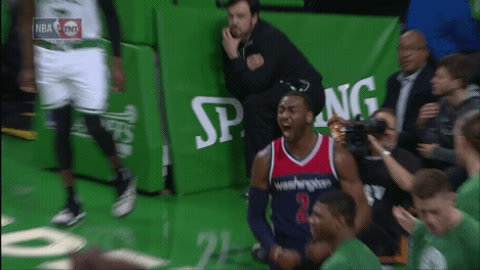

In [685]:
Image('/home/pi/was/static/WAS-0.jpg')

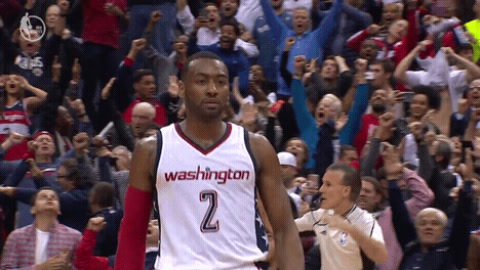

In [686]:
Image('/home/pi/was/static/WAS-24.jpg')

In [687]:
import numpy as np
import PIL

list_im =  newlis
imgs    = [ PIL.Image.open(i) for i in list_im ]
# pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )

# save that beautiful picture
imgs_comb = PIL.Image.fromarray( imgs_comb)
imgs_comb.save( '/home/pi/was/test.jpg' )    

# for a vertical stacking it is simple: use vstack
imgs_comb = np.vstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
imgs_comb = PIL.Image.fromarray( imgs_comb)
imgs_comb.save( '/home/pi/was/test-vert.jpg' )

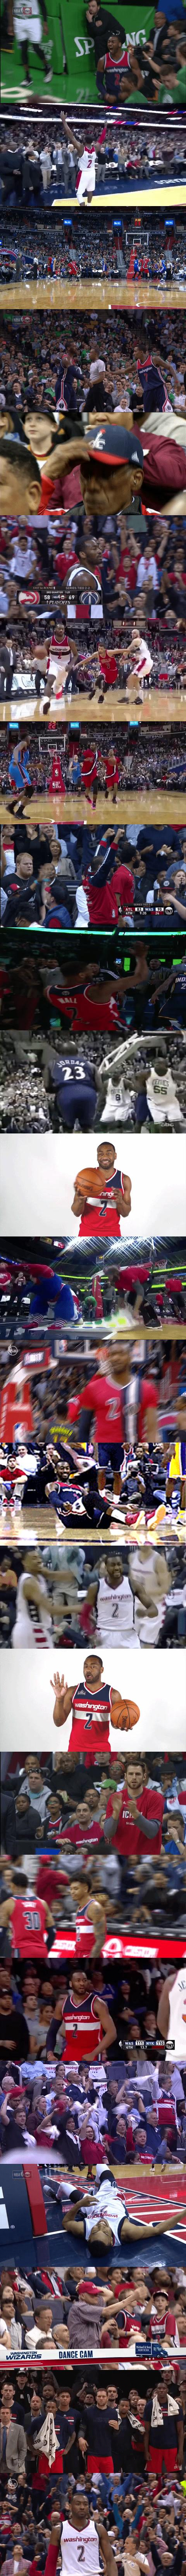

In [688]:
Image('/home/pi/was/test-vert.jpg')

In [618]:
images = map(PIL.Image.open, ['/home/pi/was/static/WAS-0.jpg', '/home/pi/was/static/WAS-24.jpg'])
widths, heights = zip(*(i.size for i in images))

total_width = sum(widths)
max_height = max(heights)

new_im = PIL.Image.new('RGB', (total_width, max_height))

x_offset = 0
for im in images:
    new_im.paste(im, (x_offset,0))

    x_offset += im.size[0]
    #Image('/home/pi/test.jpg')

new_im.save('/home/pi/was/test-two.jpg')

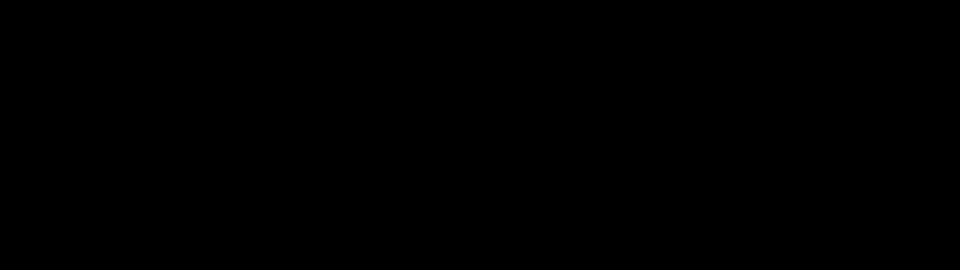

In [619]:
Image('/home/pi/was/test-two.jpg')

In [603]:
images = map(PIL.Image.open, newlis)
widths, heights = zip(*(i.size for i in images))

total_width = sum(widths)
max_height = max(heights)

new_im = PIL.Image.new('RGB', (total_width, max_height))

x_offset = 0
for im in images:
    new_im.paste(im, (x_offset,0))

    x_offset += im.size[0]
    #Image('/home/pi/test.jpg')

new_im.save('/home/pi/was/test.jpg')

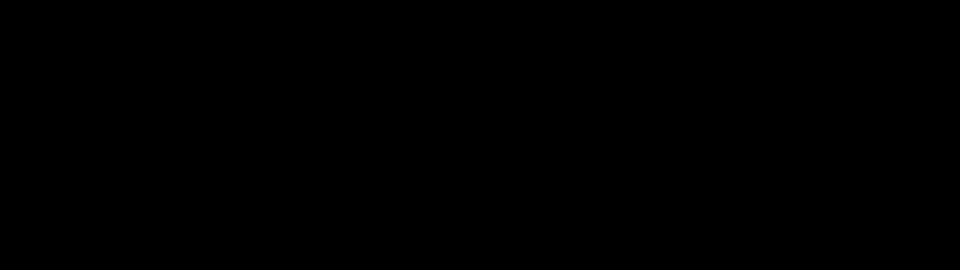

In [606]:
Image('/home/pi/was/test.jpg')

In [487]:
heights

(270,
 270,
 268,
 270,
 270,
 270,
 270,
 270,
 476,
 344,
 270,
 270,
 282,
 268,
 270,
 270,
 270,
 270,
 266,
 270,
 270,
 270,
 270,
 270,
 270,
 270,
 270,
 268,
 270,
 270,
 270,
 270,
 270,
 476,
 344,
 270,
 270,
 282,
 268,
 270,
 270,
 270,
 270,
 266,
 270,
 270,
 270,
 270,
 270,
 270)

In [488]:
images

In [489]:
 postimg = os.listdir('/home/pi/was/static')

In [490]:
print(postimg)

['MIATOR.png', 'LACLAL.png', 'CLENYK.png', 'NOPSAS.png', 'BOSBKN.png', 'MINDEN.png', 'CHIDET.png', 'SACHOU.png', 'OKCMEM.png', 'PHIMIL.png', 'ORLWAS.png', 'PORUTA.png']


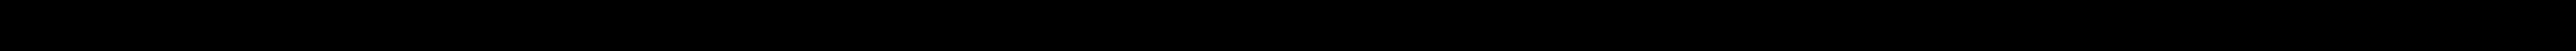

In [491]:
Image('/home/pi/test.jpg')

In [492]:
thenumber

24000

In [493]:
thlis[0]

270

In [494]:
fulnum = 0 

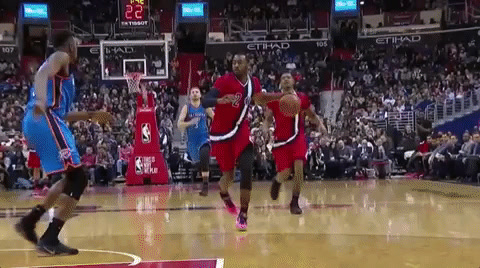

In [496]:
Image("WAS-2.jpg")

In [497]:
imgp = PIL.Image.open("WAS-0.jpg")

In [498]:
postimg

['MIATOR.png',
 'LACLAL.png',
 'CLENYK.png',
 'NOPSAS.png',
 'BOSBKN.png',
 'MINDEN.png',
 'CHIDET.png',
 'SACHOU.png',
 'OKCMEM.png',
 'PHIMIL.png',
 'ORLWAS.png',
 'PORUTA.png']

In [549]:
import dominate
from dominate.tags import *

doc = dominate.document(title='WAS')

with doc.head:
    link(rel='stylesheet', href='style.css')
    script(type='text/javascript', src='script.js')

with doc:
    with div(id='header').add(ol()):
        for i in postimg:
            if '.png' in i:
                img(src='/static/%s' % i)

    with div():
        attr(cls='body')
        p('home wins: ' + str(homewine))
        p('home loses: ' + str(homelise))
with open('/home/pi/was/index.html', 'w') as indexw:
    indexw.write(str(doc))
print(doc)

<!DOCTYPE html>
<html>
  <head>
    <title>WAS</title>
    <link href="style.css" rel="stylesheet">
    <script src="script.js" type="text/javascript"></script>
  </head>
  <body>
    <div id="header">
      <ol>
        <img src="/static/MIATOR.png">
        <img src="/static/LACLAL.png">
        <img src="/static/CLENYK.png">
        <img src="/static/NOPSAS.png">
        <img src="/static/BOSBKN.png">
        <img src="/static/MINDEN.png">
        <img src="/static/CHIDET.png">
        <img src="/static/SACHOU.png">
        <img src="/static/OKCMEM.png">
        <img src="/static/PHIMIL.png">
        <img src="/static/ORLWAS.png">
        <img src="/static/PORUTA.png">
      </ol>
    </div>
    <div class="body">
      <p>home wins: 0</p>
      <p>home loses: 0</p>
    </div>
  </body>
</html>


In [381]:
imgp.size

(480, 270)

In [382]:
thlis

[270,
 270,
 268,
 270,
 270,
 270,
 270,
 270,
 476,
 344,
 270,
 270,
 282,
 268,
 270,
 270,
 270,
 270,
 266,
 270,
 270,
 270,
 270,
 270,
 270]

In [383]:
print(nbajs.items())

dict_items([('pagination', {'count': 25, 'offset': 0, 'total_count': 7032}), ('data', [{'username': 'nba', 'type': 'gif', 'slug': 'nba-QqgBLLNASBIk0', 'title': 'washington wizards basketball GIF by NBA', 'id': 'QqgBLLNASBIk0', 'source_tld': 'nba.com', 'is_sticker': 0, 'import_datetime': '2017-01-15 03:50:54', 'content_url': '', 'user': {'username': 'nba', 'banner_url': 'https://media1.giphy.com/headers/nba/vd84lKwUL5f4.gif', 'twitter_url': 'https://twitter.com/https://twitter.com/nba', 'tumblr_url': None, 'facebook_url': 'https://facebook.com/nba', 'website_display_url': None, 'twitter': 'https://twitter.com/nba', 'display_name': 'NBA', 'metadata_description': 'GIFs directly from the National Basketball Association.', 'description': 'This is the official NBA channel on GIPHY. All of the basketball GIFS!!', 'name': 'NBA', 'guid': 'RUFrcm9uZ0BuYmEuY29t', 'instagram_url': 'https://instagram.com/nba', 'profile_url': 'https://giphy.com/nba/', 'suppress_chrome': False, 'attribution_display_n

In [384]:
os.listdir('/home/pi/artctrl/nba/galleries/')

['MIATOR.png',
 'BOSATL.png',
 'nba.jpg',
 'MINMEM.png',
 'CHAIND.png',
 'LACLAL.png',
 'MILORL.png',
 'PHXGSW.png',
 'CLENYK.png',
 'NOPSAS.png',
 'MEMDET.png',
 'BOSBKN.png',
 'MIAOKC.png',
 'MINDEN.png',
 'BKNCHI.png',
 'PHIDAL.png',
 'CHIDET.png',
 'SACHOU.png',
 'TORORL.png',
 'NYKCLE.png',
 'LALUTA.png',
 'OKCMEM.png',
 'LACNOP.png',
 'DETTOR.png',
 'PHIMIL.png',
 'ORLWAS.png',
 'PORUTA.png',
 'nba.png',
 'SASSAC.png',
 'DENPOR.png']

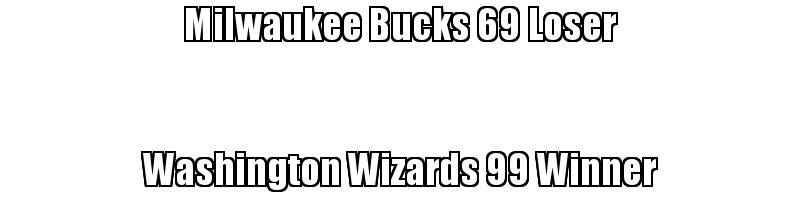

In [385]:

from IPython.display import Image
Image("/home/pi/artctrl/nba/galleries/nba.png")

In [386]:
nbgj[0]

{'awayTeam': {'finalScore': 97, 'teamID': 'BKN'},
 'finished': False,
 'gameId': 21701219,
 'homeTeam': {'finalScore': 110, 'teamID': 'BOS'},
 'seasonPhase': 'Regular',
 'startTime': '20180412T000000.000Z',
 'year': 'NbaSeason20172018'}

In [387]:
nbteam = dict()
gifdict = dict()
giflis = list()
teamid = list()


In [388]:
#nbteam.update({'hello' : 'there'})

In [389]:
#nbteam
#import random

In [11]:
for totg in range(0, totgame):
    ##print(nbgj[totg]['homeTeam']['name'])
    #print(nbgj[totg]['homeTeam']['city'])
    cityre = 'http://api.duckduckgo.com/?q={}+{}&format=json'.format(nbgj[totg]['homeTeam']['city'], nbgj[totg]['homeTeam']['name'])
    gifcity = 'http://api.giphy.com/v1/gifs/search?q={}+{}&api_key=dc6zaTOxFJmzC'.format(nbgj[totg]['homeTeam']['city'], nbgj[totg]['homeTeam']['name'])   

    reqcity = requests.get(cityre)
    urlgif  = requests.get(gifcity)
    reqgif = urlgif.json()
    lengif = len(reqgif['data'])
    

    reqjsn = (reqcity.json())
    
    
    #print(reqjsn["Abstract"
    htcit = (nbgj[totg]['homeTeam']['city'])
    disnam = (nbgj[totg]['homeTeam']['name'])
    #print(reqjsn)
    htabs = (reqjsn['Abstract'])
    tmid = (nbgj[totg]['homeTeam']['team_id'])
    teamid.append(tmid)
    
    for forgifl in range(0, lengif):
        #print(reqgif['data'][forgifl]['images']['original']['url'])
        nbteam.update({tmid : dict({str(totg) : reqgif['data'][forgifl]['images']['original']['url']})})
        giflis.append(reqgif['data'][forgifl]['images']['original']['url'])
    
    #rangif = random.choice(giflis)
    
    #print(rangif)
    
    nbteam.update({tmid : dict({'displayname' : disnam, 'city' : htcit, 'abstract' : htabs, })})
                
    #print('vs')
    
    citaway = 'http://api.duckduckgo.com/?q={}+{}&format=json'.format(nbgj[totg]['awayTeam']['city'], nbgj[totg]['awayTeam']['name'])
    
    reqcitawy = requests.get(citaway)
    jscitawy = reqcitawy.json()             
    awaycity = (nbgj[totg]['awayTeam']['city'])
    awayname = (nbgj[totg]['awayTeam']['name'])
    #print(jscitawy['Abstract'])
    zmid = (nbgj[totg]['awayTeam']['team_id'])
    meetest = PIL.Image.new("RGBA", (800, 600), (255,255,255))
    medraw = ImageDraw.Draw(meetest)
    #font = ImageFont.truetype("/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf", 32)
    #font = ImageFont.truetype("/home/wcm/Downloads/fashi954.ttf", 12)
    fontwo = ImageFont.truetype('/usr/share/fonts/truetype/freefont/FreeMono.ttf', 16)

    medraw.text((10, 10), 'Home: ', (0,0,0), font=fontwo)
    medraw.text((10, 30), htcit + ' ' + disnam + ' - home', (0,0,0), font=fontwo)
    medraw.text((10, 50), 'vs', (0,0,0), font=fontwo)
    medraw.text((10, 70), awaycity + ' ' + awayname + ' - away', (0,0,0), font=fontwo)
    
    teamid.append(zmid)
    nbteam.update({tmid : dict({'displayname' : disnam, 'city' : htcit, 'abstract' : htabs, })})
    #artim = arrow.get(nbgj[totg]['startTime'][0:8])
    #print(artim)
    #ifigt = 'http://api.giphy.com/v1/gifs/search?q={}+{}+vs+{}+{}&api_key=dc6zaTOxFJmzC'.format(nbgj[totg]['homeTeam']['city'], nbgj[totg]['homeTeam']['name'], awaycity, awayname)   
    #vsreq = requests.get(ifigt)
    #jsvs = vsreq.json()
    #print(jsvs)
    gamyr = (nbgj[totg]['startTime'][0:4])
    gammth = (nbgj[totg]['startTime'][4:6])
    gamday = (nbgj[totg]['startTime'][6:8])
    
    medraw.text((10, 90), gamyr + '/' + gammth + '/' + gamday, (0,0,0), font=fontwo)
    meetest.save('/home/{}/nbgames/galleries/{}{}.jpg'.format(myusr, tmid, zmid))
    #print(nbgj[totg]['startTime'])
    #print(nbgj[totg])

KeyError: 'city'

In [150]:
#from IPython.display import Image
#from IPython.core.display import HTML 

In [154]:
#gifset = set(giflis)

In [689]:
#with open('/home/pi/git/nbgames/posts/test.md', 'w') as testmd:
#    for gi in gifset:
#        print(gi)
#        testmd.write('![](' + gi + ')\n')
    

In [690]:
#for gi in gifset:
#    print(gi)
#    Image(gi)

In [691]:
#nbteam['0']

In [692]:
#gifdict

In [693]:
#gifdict

In [694]:
#nbteam['NYK']

In [695]:
#nbteam['PHI']

In [696]:
nbteam

{}

In [697]:
#import requests

In [698]:
#reqplay = requests.get('http://api.suredbits.com/nba/v0/players')

In [699]:
#reqjs = reqplay.json()

In [700]:
#print(reqjs[0]['fullName'])

In [9]:
#lereq = len(reqjs)

In [11]:
#fulnam = list()

In [701]:
#for ler in range(0, lereq):
#    print(reqjs[ler]['fullName'])
#    fulnam.append(reqjs[ler]['fullName'])